# S04_T01 Visualització_d'un_DataSet

![sierra](tree1.jpg)
S04_T01

In [68]:
# Importar
%matplotlib inline
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

# Dades
avions = pd.read_csv('AirDelay/DelayedFlights.csv')

# DataFrame
avions_df = pd.DataFrame(avions, columns=['DepDelay','ArrDelay', 'UniqueCarrier','AirTime'])
avions_df

,DepDelay,ArrDelay,UniqueCarrier,AirTime
0,8.0,-14.0,WN,116.0
1,19.0,2.0,WN,113.0
2,8.0,14.0,WN,76.0
3,34.0,34.0,WN,77.0
4,25.0,11.0,WN,87.0
...,...,...,...,...
1936753,30.0,25.0,DL,120.0
1936754,57.0,75.0,DL,78.0
1936755,80.0,99.0,DL,122.0
1936756,11.0,9.0,DL,89.0


In [69]:
avions_df.drop(avions_df.columns[avions_df.columns.str.contains('unnamed', case=False)], axis=1,
          inplace=True)

avions_df.fillna(method='ffill', inplace=True)

# Exercici_1

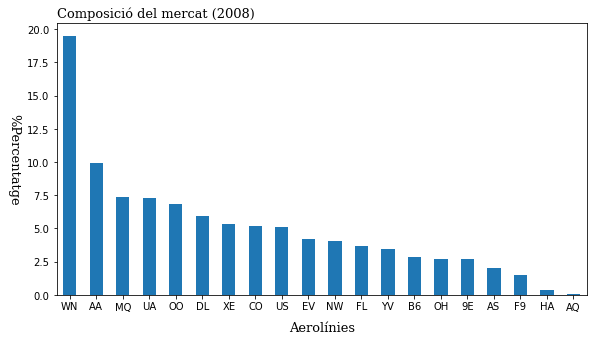

In [70]:
## UniqueCarrier

# DATA
percent = (avions_df['UniqueCarrier'].value_counts()/avions_df['UniqueCarrier'].value_counts().sum())*100
percent = round(percent,2)

# CREATE PLOT
fig = plt.figure(figsize =(9.5, 5))

# PLOT
percent.plot(kind='bar',width = 0.5)

# CUSTOMIZE PLOT
font01 = {'family':'serif','size':13}

plt.title("Composició del mercat (2008)",loc='left',fontdict=font01)
plt.xlabel("Aerolínies",labelpad=10,fontdict=font01)
plt.ylabel("%Percentatge",rotation=-90, labelpad=20,fontdict=font01)
plt.xticks(fontsize=(10),rotation=0)
plt.savefig('plot1.jpeg', dpi=200);

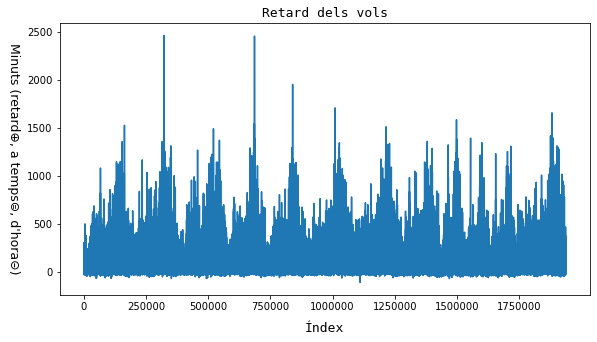

In [71]:
## ArrDelay

# DATA
arrivaldelay = avions_df['ArrDelay']

# CREATE PLOT
fig = plt.figure(figsize =(9.5, 5))

# PLOT
arrivaldelayplt = arrivaldelay.plot()

# CUSTOMIZE PLOT
font02 = {'family':'monospace','size':13}
positions = np.arange(0,len(avions_df),250000)

plt.title("Retard dels vols",loc='center',fontdict=font02)
plt.xlabel("Índex",labelpad=10,fontdict=font02)
plt.ylabel("Minuts (retard⊕, a temps⊜, d'hora⊝)",rotation=-90, labelpad=20,fontsize=12.5)
plt.xticks(positions,positions)
plt.savefig('plot2.jpeg', dpi=200);

+ Els vols en negatiu significa que l'avió ha arribat abans de l'hora programada, **'d'hora'**.

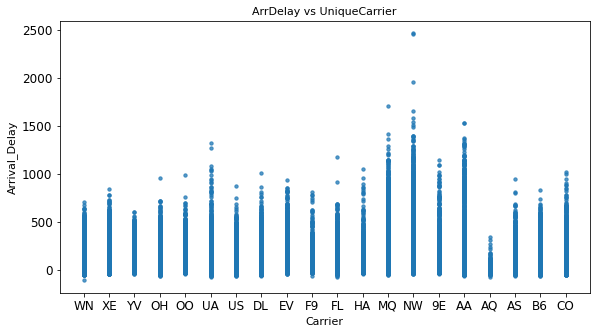

In [72]:
## ArrDelay vs UniqueCarrier

# DATA
arrivaldelay = avions_df['ArrDelay']
carrier = avions_df['UniqueCarrier']

# CREATE PLOT
fig, axs = plt.subplots(figsize =(9.5, 5))

# PLOT
axs.scatter(carrier,arrivaldelay, marker='.', s=45, alpha=.75)

# CUSTOMIZE PLOT
font03 = {'family':'sans-serif','size':11}

axs.set_title('ArrDelay vs UniqueCarrier', fontdict=font03)
axs.set_xlabel('Carrier', fontdict=font03)
axs.set_ylabel('Arrival_Delay', fontdict=font03)
axs.tick_params(axis='both',labelsize= 12, rotation=0)
plt.savefig('plot3.jpeg', dpi=200);

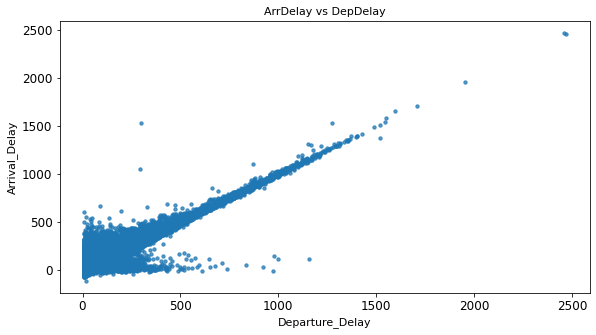

In [73]:
## ArrDelay vs DepDelay

# DATA
arrivaldelay = avions_df['ArrDelay']
carrier = avions_df['DepDelay']

# CREATE PLOT
fig, axs = plt.subplots(figsize =(9.5, 5))

# PLOT
axs.scatter(carrier,arrivaldelay, marker='.', s=45, alpha=.75)

# CUSTOMIZE PLOT
font03 = {'family':'sans-serif','size':11}

axs.set_title('ArrDelay vs DepDelay', fontdict=font03)
axs.set_xlabel('Departure_Delay', fontdict=font03)
axs.set_ylabel('Arrival_Delay', fontdict=font03)
axs.tick_params(axis='both',labelsize= 12, rotation=0)
plt.savefig('plot4.jpeg', dpi=200);

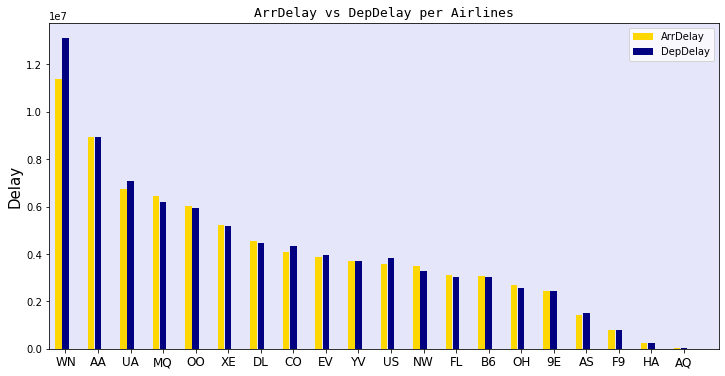

In [74]:
## ArrDelay vs DepDelay vs UniqueCarrier

# DATA
barplot = avions_df.groupby('UniqueCarrier').sum()[['ArrDelay','DepDelay']]
barplot = barplot.sort_values('ArrDelay', ascending=False) # SortValues

# CREATE PLOT
fig, ax = plt.subplots(1, figsize=(12, 6))
x = np.arange(0, len(barplot.index))

# PLOT
plt.bar(x - 0.22, barplot['ArrDelay'], width = 0.20, color = 'gold')
plt.bar(barplot.index, barplot['DepDelay'], width = 0.2, color = 'navy')

## CUSTOMIZE PLOT
font03 = {'family':'monospace','size':13}

ax.set_facecolor("lavender")
plt.ylabel('Delay',fontsize=15)
plt.xticks(x, barplot.index, fontsize=12)
plt.xlim(-0.5, )

plt.title('ArrDelay vs DepDelay per Airlines', loc ='center',fontdict=font03)
plt.legend(['ArrDelay', 'DepDelay'], loc='upper right', ncol = 1)
plt.savefig('plot5.jpeg', dpi=200);

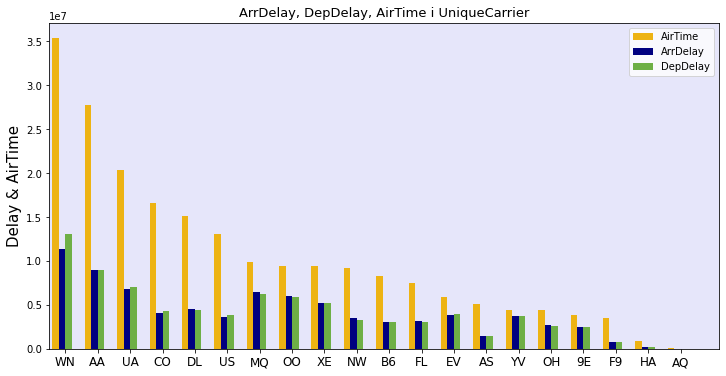

In [75]:
## ArrDelay, DepDelay, AirTime i UniqueCarrier

# DATA
barplot2 = avions_df.groupby('UniqueCarrier').sum()[['ArrDelay','DepDelay','AirTime']]
barplot2 = barplot2.sort_values('AirTime', ascending=False)

# CREATE PLOT
fig, ax = plt.subplots(1, figsize=(12, 6))
w = np.arange(0, len(barplot2.index))

# PLOT
plt.bar(w - 0.3, barplot2['AirTime'], width = 0.2, color = '#edb313')
plt.bar(w - 0.1, barplot2['ArrDelay'], width = 0.2, color = 'navy')
plt.bar(w + 0.1, barplot2['DepDelay'], width = 0.2, color = '#6EAF46')

## CUSTOMIZE PLOT
ax.set_facecolor("lavender")
plt.ylabel('Delay & AirTime',fontsize=15)
plt.xticks(w, barplot2.index,fontsize=12)
plt.xlim(-0.5, )

plt.title('ArrDelay, DepDelay, AirTime i UniqueCarrier', loc ='center',fontsize=13)
plt.legend(['AirTime', 'ArrDelay','DepDelay'], loc='upper right', ncol = 1)

plt.savefig('plot6.jpeg', dpi=200);

# Exercici_2

Exporta els gràfics com imatges o com html.

# Exercici_3

Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.